# Test

## Import modules

In [1]:
%matplotlib inline
import numpy as np
import chainer
from chainer import cuda
import matplotlib.pyplot as plt

import active_inference2 as ai
from eye import Eye

## Set up env

In [7]:
#xp = np
world = np.load('datagen/mnist_matrix/world1.npy')

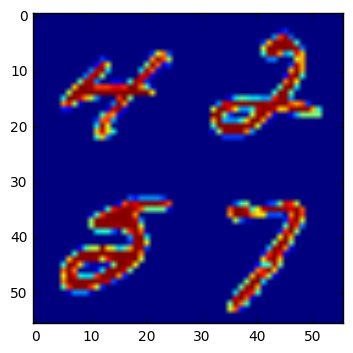

In [8]:
plt.imshow(world)

## Training model

In [9]:
# define network
sensor = 784
hidden = 100
action = 2
encoder = ai.Encoder(sensor, hidden)
decoder = ai.Decoder(hidden, sensor)
action = ai.Action(sensor, hidden, action)
ainet = ai.ActiveInference(encoder, decoder, action)
fenergy = ai.FreeEnergy(ainet)
eye = Eye(world, np.sqrt(sensor))

# 
gpu_flag=-1
if gpu_flag >= 0:
    cuda.check_cuda_available()

xp = cuda.cupy if gpu_flag >=0 else np
    
if gpu_flag >= 0:
    cuda.get_device(gpu_flag).use()
    fenergy.to_gpu
    
optimizer = chainer.optimizers.Adam()
optimizer.setup(fenergy)
#optimizer.crip_grads(10)

In [10]:
# Training
n_epoch = 300
length_epoch = 100
n_bprop = 1

mean_loss=[]
mean_reconstruction_loss=[]

for epoch in range(1, n_epoch):
    print('epoch', epoch)

    sum_loss = 0
    sum_recon_loss = 0
    dx, dy = 0, 0
    loss = 0
    fenergy.cleargrads()
    
    for i in range(length_epoch):
        glim = eye.glimpse(dx, dy).reshape(1, sensor).astype(np.float32)
        x = chainer.Variable(xp.asarray(glim))
        loss += fenergy(x)
        action = ainet.a
        dx = int(action[0][0])
        dy = int(action[0][1])
        
        #print np.array([eye.x, eye.y])
        # Recording Attention point and  Pred Image
        if epoch == 1:
            trajectory = np.array([eye.x, eye.y])[:,np.newaxis]
            pics = ainet.x_mu.data.reshape(28,28)[:,:,np.newaxis]
        else:
            trajectory = np.concatenate((trajectory,np.array([eye.x, eye.y])[:,np.newaxis]),axis=1)
            pics = np.concatenate((pics,ainet.x_mu.data.reshape(28,28)[:,:,np.newaxis]),axis=2)
        
        if i != 0 &(i + 1) % n_bprop == 0:
            fenergy.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizer.update()

        sum_loss += float(fenergy.loss.data)
        sum_recon_loss += float(fenergy.recon_loss.data)

    print('mean loss={}, mean reconstruction loss={}'
          .format(sum_loss / length_epoch,
                  sum_recon_loss / length_epoch))
    
    mean_loss.append(sum_loss / length_epoch)
    mean_reconstruction_loss.append(sum_recon_loss / length_epoch)


('epoch', 1)
mean loss=428.863668671, mean reconstruction loss=402.24786026
('epoch', 2)
mean loss=324.691730804, mean reconstruction loss=296.534630737
('epoch', 3)
mean loss=305.750409241, mean reconstruction loss=280.340971222
('epoch', 4)
mean loss=310.642401123, mean reconstruction loss=287.142010651
('epoch', 5)
mean loss=307.279278412, mean reconstruction loss=284.000986328
('epoch', 6)
mean loss=303.908302917, mean reconstruction loss=284.853654022
('epoch', 7)
mean loss=296.532960968, mean reconstruction loss=272.877237701
('epoch', 8)
mean loss=287.565253754, mean reconstruction loss=270.440209045
('epoch', 9)
mean loss=281.198858185, mean reconstruction loss=267.512293243
('epoch', 10)
mean loss=288.359674225, mean reconstruction loss=272.613188782
('epoch', 11)
mean loss=279.597670898, mean reconstruction loss=267.289443512
('epoch', 12)
mean loss=275.136141052, mean reconstruction loss=263.263703156
('epoch', 13)
mean loss=293.156066132, mean reconstruction loss=277.659018

## Save results

In [13]:
np.save('datas_epoch500_bias/predict_image_epoch500_bias2_lstm', pics)
np.save('datas_epoch500_bias/recon_loss_epoch500_bias2_lstm', mean_reconstruction_loss)
np.save('datas_epoch500_bias/trajectory_epoch500_bias2_lstm', trajectory)

#from chainer import serializers


## Plot error

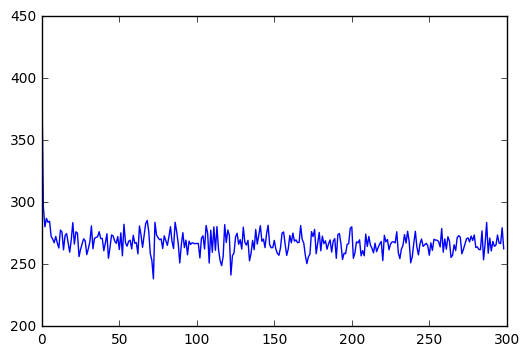

In [14]:
plt.plot(mean_reconstruction_loss)

### Prediction in each epoch

In [ ]:
hoge= np.sqrt(len(pics[0,0,:]))
plt.figure(figsize=(15, 15), dpi=800)
for i in xrange(len(pics[0,0,:])):
    plt.subplot(hoge+1,hoge+1 , i+1)
    fig = plt.imshow(pics[:,:,i], cmap=plt.cm.gray)
    plt.axis('off')

In [ ]:
plt.imshow(pics[:,:,100],cmap="gray")

### Attention log

(0, 84.0)

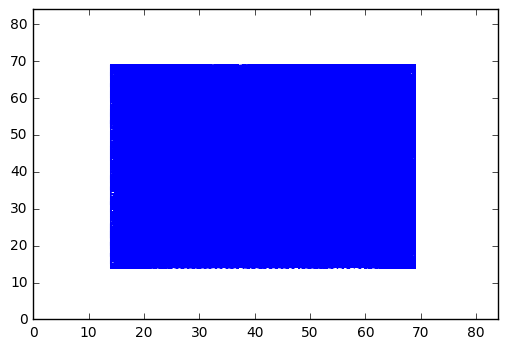

In [44]:
plt.plot(trajectory[0,:],trajectory[1,:])
plt.xlim([0, world.shape[0]+np.sqrt(sensor)])
plt.ylim([0,world.shape[1]+np.sqrt(sensor)])

In [33]:
len(trajectory.T)

58831

(0, 84.0)

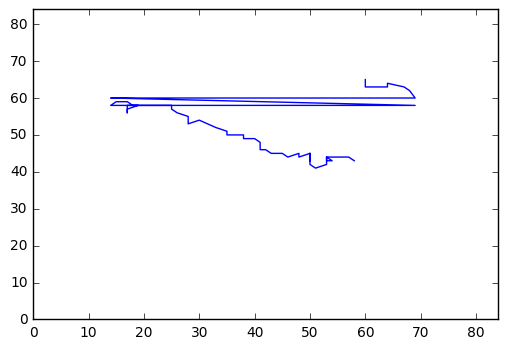

In [8]:
i=100
plt.plot(trajectory[0,:i],trajectory[1,:i])
plt.xlim([0, world.shape[0]+np.sqrt(sensor)])
plt.ylim([0,world.shape[1]+np.sqrt(sensor)])

(0, 84.0)

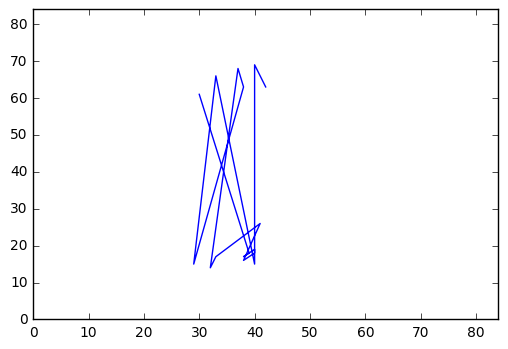

In [10]:
i=20
plt.plot(trajectory[0,-i:],trajectory[1,-i:])
plt.xlim([0, world.shape[0]+np.sqrt(sensor)])
plt.ylim([0,world.shape[1]+np.sqrt(sensor)])

In [ ]:
from chainer import serializers


/usr/local/lib/python2.7/dist-packages/matplotlib/animation.py:784: UserWarning: MovieWriter imagemagick unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: Cannot save animation: no writers are available. Please install mencoder or ffmpeg to save animations.

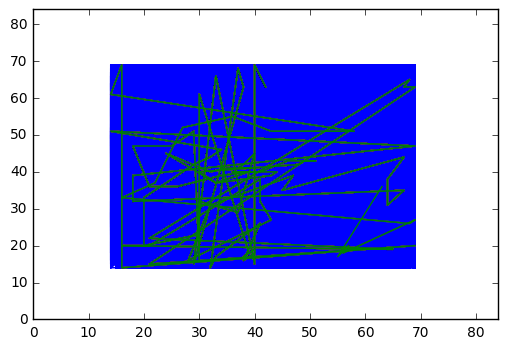

In [7]:
import matplotlib.animation as animation

fig = plt.figure()
ims = []
start = 0
end   = 100

for i in range(start,end):
    plt.xlim([0, world.shape[0]+np.sqrt(sensor)])
    plt.ylim([0,world.shape[1]+np.sqrt(sensor)])    
    im=plt.plot(trajectory[0,-i:],trajectory[1,-i:])     
    ims.append(im)       

ani = animation.ArtistAnimation(fig, ims, interval=1)
ani.save("output.gif", writer="imagemagick")

In [19]:
np.random.randint(0,2,(2,3))

array([[0, 1, 1],
       [0, 1, 0]])

In [21]:
True==0

False

In [2]:
import world

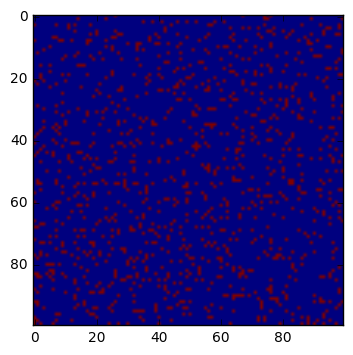

In [22]:
plt.imshow(world.Glass().world)

In [25]:
world.Glass.process()
plt.imshow(world.Glass().world)

TypeError: unbound method process() must be called with Glass instance as first argument (got nothing instead)